# Using the API

In [1]:
from waze import Coordinate, get_route_plan

# example inputs

# SG
star_vista = Coordinate(name="Star Vista", latitude=1.3068, longitude=103.7884)
tuas = Coordinate(name="Tuas Checkpoint", latitude=1.336450, longitude=103.647072)

# MY
kajang = Coordinate(name="Kajang", latitude=2.993518, longitude=101.787407)
georgetown = Coordinate(name="Georgetown", latitude=5.416393, longitude=100.332680)
subang_parade = Coordinate(name="Subang Parade", latitude=3.0815, longitude=101.5851)

In [2]:
plan = get_route_plan(src=star_vista, dst=subang_parade)

In [4]:
hr = plan.totalSeconds / 60 / 60
distance = plan.totalLength / 1000

print(f"Route: {plan.src.name} => {plan.dst.name} , {plan.routeName}")
print(f"Distance: {distance} km")
print(f"Estimated Travel Time: {int(hr)} hours and {(hr - int(hr)) * 60:.0f} minutes")
print(f"Toll : {plan.isToll}")
print(f"Fastest Route: {plan.isFastest}")
print(f"Toll Price : RM{plan.tollPriceInfo.tollPrice}")

Route: Star Vista => Subang Parade , E2 Lebuhraya Utara Selatan Simpang Renggam
Distance: 368.594 km
Estimated Travel Time: 3 hours and 35 minutes
Toll : True
Fastest Route: True
Toll Price : RM44.59


# Visualizing the Routes

With a sufficiently large dataset, we can do cool things like
- show how the optimal/fastest route changes over time
- plot hot spots of reported incidents/accidents along popular routes via polygon counting or k-means clustering

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString

geom = gpd.read_file(
    "https://raw.githubusercontent.com/dosm-malaysia/data-open/main/datasets/geodata/administrative_1_state.geojson"
).query("state != 'Sarawak' and state != 'Sabah' and state != 'W.P. Labuan'")

Text(101.5851, 3.0815, 'Subang Parade')

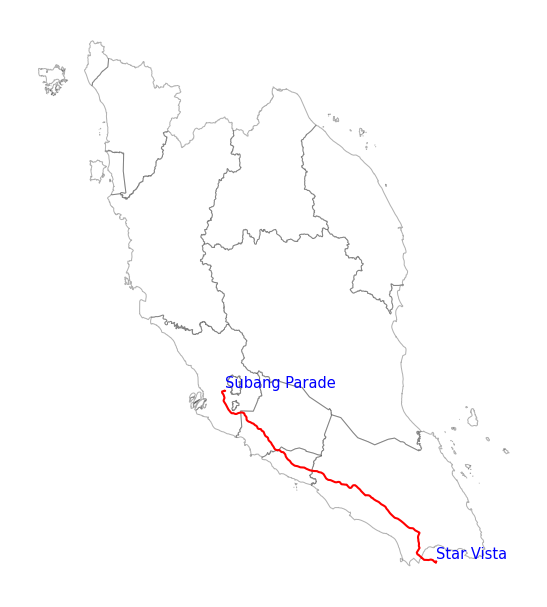

In [6]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=150)
ax.axis("off")

route = LineString([[o.latitude, o.longitude] for o in plan.geoPath])

TEXT_DISPLAY_KWARGS = dict(
	ha="left",
    va="bottom",
    fontsize=7,
    color="blue",
)

geom.plot(ax=ax, edgecolor="black", color="white", linewidth=0.5, alpha=0.3)
ax.plot(*route.xy[::-1], color="red", linewidth=1)
ax.text(
    plan.src.longitude,
    plan.src.latitude,
    plan.src.name,
    **TEXT_DISPLAY_KWARGS
)
ax.text(
    plan.dst.longitude,
    plan.dst.latitude,
    plan.dst.name,
    **TEXT_DISPLAY_KWARGS
)